In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("D:/csvFiles/car_details.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [5]:
df.info

<bound method DataFrame.info of                                      name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission      

In [6]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df["fuel"].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [8]:
df["seller_type"].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [9]:
df["transmission"].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [10]:
df["owner"].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [11]:
df["fuel"] = df["fuel"].map({"Diesel":0, "Petrol":1, "CNG":2, "LPG":3, "Electric":4})

In [12]:
df["seller_type"] = df["seller_type"].map({"Individual":0, "Dealer":1, "Trustmark Dealer":2})

In [13]:
df["transmission"] = df["transmission"].map({"Manual":0, "Automatic":1})

In [14]:
df["owner"] = df["owner"].map({"First Owner":0, "Second Owner":1, "Third Owner":2, "Fourth & Above Owner":3, "Test Drive Car":4})

In [15]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


In [16]:
#splitting the data 

from sklearn.model_selection import train_test_split

In [17]:
x = df.drop(["name","selling_price"], axis=1)
y = df["selling_price"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
#training the linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
lmodel = LinearRegression()
lmodel.fit(x_train, y_train)

LinearRegression()

In [21]:
#applying training model to predict selling price from training set

pred_train = lmodel.predict(x_train)

In [22]:
print("Coefficients:", lmodel.coef_)
print("\nIntercept:", lmodel.intercept_)
print("\nMean squared error (MSE): %.2f" % mean_squared_error(y_train, pred_train))
print("\nCoefficient of determination (R^2): %.2f" % r2_score(y_train, pred_train))

Coefficients: [ 3.71058738e+04 -7.88379348e-01 -2.44539106e+05  9.31166296e+04
  8.16411427e+05 -8.76836478e+03]

Intercept: -74125931.59141661

Mean squared error (MSE): 187625044084.09

Coefficient of determination (R^2): 0.43


In [23]:
#applying training model to predict selling price from test set

pred_test = lmodel.predict(x_test)

In [24]:
print("Coefficients:", lmodel.coef_)
print("\nIntercept:", lmodel.intercept_)
print("\nMean Squared error (MSE): %.2f" % mean_squared_error(y_test, pred_test))
print("\nCoefficient of determination (R^2): %.2f" % r2_score(y_test, pred_test))

Coefficients: [ 3.71058738e+04 -7.88379348e-01 -2.44539106e+05  9.31166296e+04
  8.16411427e+05 -8.76836478e+03]

Intercept: -74125931.59141661

Mean Squared error (MSE): 169251258153.67

Coefficient of determination (R^2): 0.51


In [25]:
# scatter plot of experimental vs predicted selling_price

import matplotlib.pyplot as plt
import numpy as np

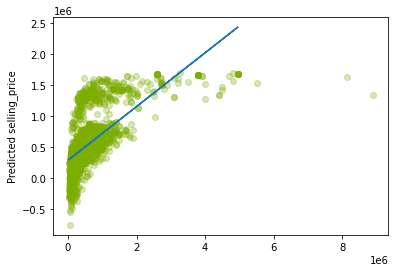

In [26]:
plt.scatter(x=y_train, y=pred_train, c="#7CAE00", alpha=0.3)
z = np.polyfit(y_train, pred_train, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test))

plt.ylabel('Predicted selling_price')
plt.show()

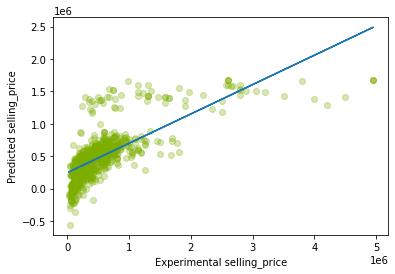

In [27]:
plt.scatter(x=y_test, y=pred_test, c="#7CAE00", alpha=0.3)
z = np.polyfit(y_test, pred_test, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test))

plt.ylabel('Predicted selling_price')
plt.xlabel("Experimental selling_price")
plt.show()